In [2]:
# import geopandas
import geopandas as gpd

# import matplotlib
import matplotlib.pyplot as plt

In [3]:
# load the data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# print the top 5 rows
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
# the data types
world.dtypes

pop_est          int64
continent       object
name            object
iso_a3          object
gdp_md_est     float64
geometry      geometry
dtype: object

In [6]:
# print the active geometry
world.geometry.name

'geometry'

In [7]:
# rename the column and set the geometry
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')

# print the active geometry
world.geometry.name

'borders'

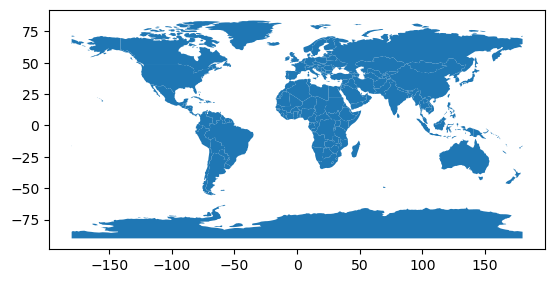

In [8]:
# plot the geometry
world.plot()
plt.show()

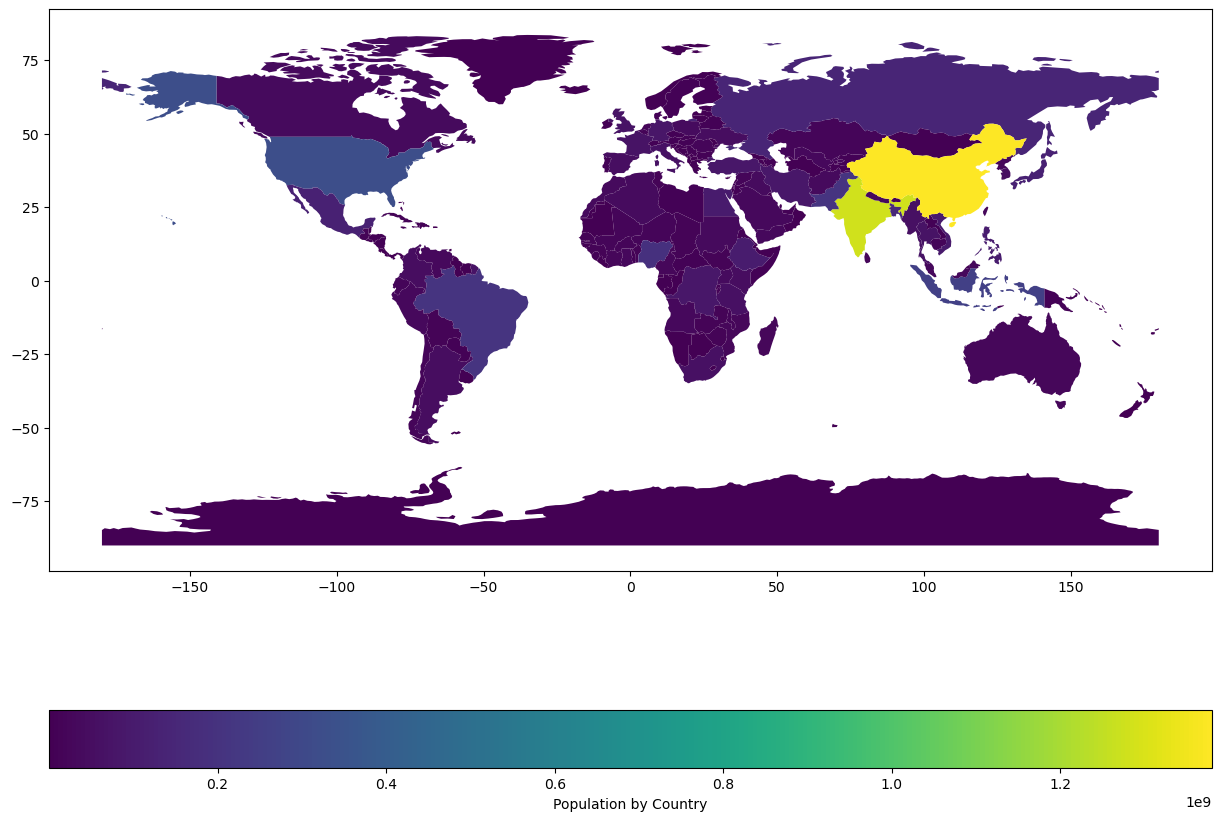

In [9]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# create the map
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
plt.show()

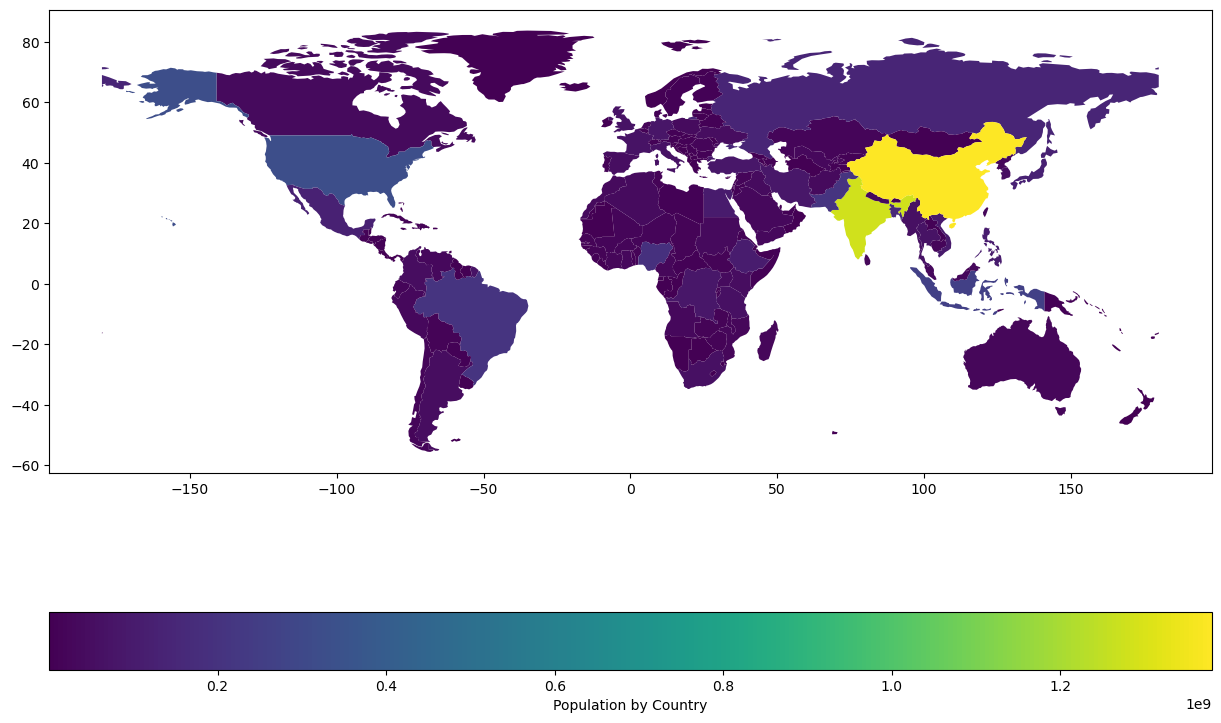

In [10]:
# filter the data-frame
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# create the map
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})
plt.show()

In [11]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [12]:
cities.head()

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


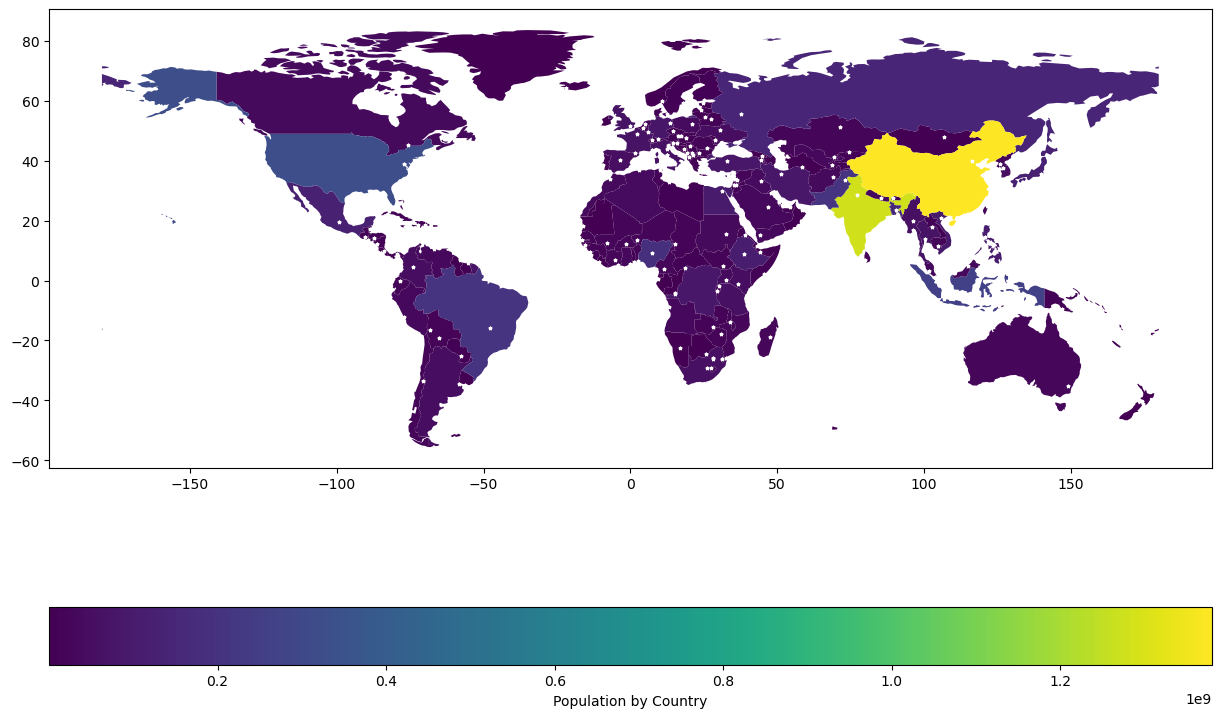

In [13]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(15,12))

# a layer of countries
world.plot(column='pop_est', ax=ax, legend=True,
           legend_kwds={'label': "Population by Country",
                        'orientation': "horizontal"})

# a layer of cities
cities.plot(ax=ax ,marker='*', color='white', markersize=5)
plt.show()